In [1]:
!pip install modelzoo-client[transformers]


     |████████████████████████████████| 46 kB 2.6 MB/s 
     |████████████████████████████████| 82 kB 859 kB/s 
     |████████████████████████████████| 789 kB 47.1 MB/s 
     |████████████████████████████████| 4.0 MB 39.8 MB/s 
     |████████████████████████████████| 895 kB 46.6 MB/s 
     |████████████████████████████████| 77 kB 3.5 MB/s 
     |████████████████████████████████| 6.5 MB 46.4 MB/s 
     |████████████████████████████████| 596 kB 56.1 MB/s 
  Created wheel for names: filename=names-0.3.0-py3-none-any.whl size=803699 sha256=8cfe3275e92902cc4743f85bd8b0f82a0a732069e8ec03b6acc63ef6578c9de6
  Stored in directory: /root/.cache/pip/wheels/05/ea/68/92f6b0669e478af9b7c3c524520d03050089e034edcc775c2b
Successfully built names
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      S

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
import transformers

In [4]:
!pip install tensorflow-addons
!pip install tensorflow

     |████████████████████████████████| 1.1 MB 10.1 MB/s 
     |████████████████████████████████| 462 kB 6.5 MB/s 


In [5]:
pip install -U bert-serving-server bert-serving-client

     |████████████████████████████████| 61 kB 277 kB/s 
  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=b1e017e1e7e82581523630c93c15cbc63af3fc102a93a06bc6ff347c7a1d2875
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [6]:
# Importing necessary Libraries:
import pandas as pd
# from transformers import TFBertModel, BertTokenizer
seed_value = 29
import os
os.environ['PYTHONHASHSEED'] = str(seed_value)
import random
random.seed(seed_value)
import numpy as np
np.random.seed(seed_value)
np.set_printoptions(precision=2)
import tensorflow as tf
tf.random.set_seed(seed_value)
# import tensorflow_addons as tfa
import tensorflow.keras as keras
# import tensorflow.keras.layers as layers
# from tensorflow.keras.callbacks import ModelCheckpoint
import re
import matplotlib.pyplot as plt
from sklearn.metrics import auc, roc_curve

In [7]:
# Uploading dataset to google collab
from google.colab import files
uploaded = files.upload()

Saving clean_data.csv to clean_data.csv


In [8]:
# Converting uploaded dataset to DataFrame
import io
data = pd.read_csv(io.BytesIO(uploaded['clean_data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [9]:
data.head

<bound method NDFrame.head of       type                                              posts  \
0     INFJ  intj moment sportscenter top ten play prankswh...   
1     ENTP  finding lack post alarmingsex boring position ...   
2     INTP  good one course say know blessing cursedoes ab...   
3     INTJ  dear intp enjoyed conversation day esoteric ga...   
4     ENTJ  youre firedthats another silly misconception a...   
...    ...                                                ...   
8670  ISFP  always think cat fi doms reason website become...   
8671  ENFP  soif thread already exists someplace else heck...   
8672  INTP  many question thing would take purple pill pic...   
8673  INFP  conflicted right come wanting child honestly m...   
8674  INFP  long since personalitycafe although seem chang...   

      type of encoding  
0                    8  
1                    3  
2                   11  
3                   10  
4                    2  
...                ...  
8670          

In [10]:
# Pre-Processsing the data
import re
def text_preprocessing(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text.encode('ascii', 'ignore').decode('ascii')
    if text.startswith("'"):
        text = text[1:-1]
    return text

In [11]:
# Pre-Processing the Labels from 1 column to 4 and converting categorical data into Numeric.
N_AXIS = 4
MAX_SEQ_LEN = 128
BERT_NAME = 'bert-base-uncased'
'''
EMOTIONAL AXES:
Introversion (I) – Extroversion (E)
Intuition (N) – Sensing (S)
Thinking (T) – Feeling (F)
Judging (J) – Perceiving (P)
'''
axes = ["I-E","N-S","T-F","J-P"]
classes = {"I":0, "E":1, # axis 1
           "N":0,"S":1, # axis 2
           "T":0, "F":1, # axis 3
           "J":0,"P":1} # axis 4

In [12]:
# Splitting data into test and train and pre-processing the input data so that it can be passed into a Bert Model.
train_n=6624
val_n=1024
test_n=1024
# data = pd.read_csv("mbti_1.csv")
data = data.sample(frac=1)
labels = []
print(data)
for personality in data["type"]:
    pers_vect = []
    for p in personality:
        pers_vect.append(classes[p])
    labels.append(pers_vect)
sentences = data["posts"].apply(str).apply(lambda x: text_preprocessing(x))
labels = np.array(labels, dtype="float32")
train_sentences = sentences[:train_n]
y_train = labels[:train_n]
val_sentences = sentences[train_n:train_n+val_n]
y_val = labels[train_n:train_n+val_n]
test_sentences = sentences[train_n+val_n:train_n+val_n+test_n]
y_test = labels[train_n+val_n:train_n+val_n+test_n]

      type                                              posts  \
4420  INFP  guess preparing wwiii start whole country tryn...   
7570  ENTJ  like whenever start talking anything abstract ...   
2807  INFP  really strange fear shiny jewelry metal especi...   
463   ISTP  exactly cheerssame curioushaha ditto picture m...   
3060  INFJ  may pop struggling perfectionism long time wou...   
...    ...                                                ...   
920   INFP  excellent example explanation would able provi...   
864   INTP  thinking samewe sometimesi mentioned paarthuna...   
808   ISTP  associate professional flight technologynormal...   
6380  INFJ  love bondi sorry lostmemories madekept itso ge...   
8149  INTJ  posted forgive already posted including classi...   

      type of encoding  
4420                 9  
7570                 2  
2807                 9  
463                 15  
3060                 8  
...                ...  
920                  9  
864                

In [13]:
print(train_sentences.shape,y_train.shape)

(6624,) (6624, 4)


In [14]:
print(val_sentences.shape,y_val.shape)

(1024,) (1024, 4)


In [15]:
print(test_sentences.shape,y_test.shape)

(1024,) (1024, 4)


In [16]:
vocab_size = 10000
trunc_type = "post"
pad_type = "post"
oov_tok = "<OOV>"
maxlen = 1500

In [17]:
data['posts'] = [str(i) for i in data['posts'].values]

In [18]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=vocab_size, filters='!"#$%&()*+,-./\:;<=>?@[\]^_`{|}~', lower=False)
tokenizer.fit_on_texts(data['posts'].values)

In [19]:
maxlen = 1500
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, maxlen = maxlen, truncating = trunc_type, padding = pad_type)

val_sequences = tokenizer.texts_to_sequences(val_sentences)
val_padded = pad_sequences(val_sequences, maxlen = maxlen, truncating = trunc_type, padding = pad_type)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten, Dropout, Conv1D, GlobalMaxPool1D

def create_model():
    op = tf.keras.optimizers.Adam(learning_rate=0.00001)

    model = Sequential()
    model.add(Embedding(vocab_size, 256, input_length=maxlen))
    model.add(LSTM(60, return_sequences=True))
    model.add(GlobalMaxPool1D())
    model.add( Dropout(0.1))
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.1))
    model.add(Dense(4, activation="softmax"))
    model.compile(loss='categorical_crossentropy', optimizer=op, metrics=['accuracy'])
  
    return model

In [21]:
model = create_model()

In [22]:
history = model.fit(train_padded, y_train, epochs =20,batch_size=64, verbose = 1, validation_data = (val_padded, y_val),  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

Epoch 1/20
104/104 [==============================] - 13s 71ms/step - loss: 2.0998 - accuracy: 0.3401 - val_loss: 2.0865 - val_accuracy: 0.3428
Epoch 2/20
104/104 [==============================] - 7s 64ms/step - loss: 2.0846 - accuracy: 0.3043 - val_loss: 2.0709 - val_accuracy: 0.2100
Epoch 3/20
104/104 [==============================] - 7s 67ms/step - loss: 2.0679 - accuracy: 0.2532 - val_loss: 2.0524 - val_accuracy: 0.1475
Epoch 4/20
104/104 [==============================] - 7s 65ms/step - loss: 2.0450 - accuracy: 0.2120 - val_loss: 2.0241 - val_accuracy: 0.1445
Epoch 5/20
104/104 [==============================] - 7s 65ms/step - loss: 2.0127 - accuracy: 0.1712 - val_loss: 1.9846 - val_accuracy: 0.1445
Epoch 6/20
104/104 [==============================] - 8s 78ms/step - loss: 1.9700 - accuracy: 0.1636 - val_loss: 1.9355 - val_accuracy: 0.1445
Epoch 7/20
104/104 [==============================] - 7s 65ms/step - loss: 1.9207 - accuracy: 0.1579 - val_loss: 1.8873 - val_accuracy: 0.144

0     2.099830
1     2.084620
2     2.067932
3     2.044987
4     2.012710
5     1.970003
6     1.920659
7     1.896900
8     1.892912
9     1.913661
10    1.929633
Name: loss, dtype: float64 0     2.086461
1     2.070916
2     2.052410
3     2.024101
4     1.984623
5     1.935466
6     1.887340
7     1.873886
8     1.879149
9     1.890867
10    1.903480
Name: val_loss, dtype: float64


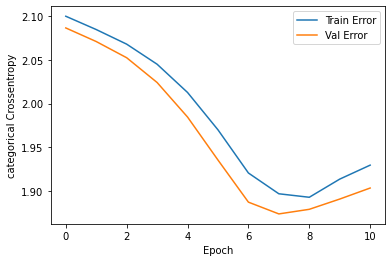

In [23]:
hist = pd.DataFrame(history.history)
print(hist['loss'],hist['val_loss'])
hist["epoch"] = history.epoch
# Plotting the Train Vs Val Error:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('categorical Crossentropy')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 50])

plot_history()

In [24]:
maxlen = 1500
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen = maxlen, truncating = trunc_type, padding = pad_type)

predictions = model.predict(test_padded)
model.evaluate(test_padded, y_test, batch_size=32)

32/32 [==============================] - 1s 23ms/step - loss: 1.9547 - accuracy: 0.1475


[1.9547337293624878, 0.1474609375]

In [25]:
from tensorflow.keras.optimizers import Adam
def create_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 256, input_length=maxlen))
          # model.add(SimpleRNN(EMBEDDING_VECTOR_LENGTH, dropout=DROPOUT, recurrent_dropout=DROPOUT, activation='sigmoid', kernel_initializer='zeros'))
          # model.add(GRU(EMBEDDING_VECTOR_LENGTH, dropout=DROPOUT, recurrent_dropout=DROPOUT, activation='sigmoid', kernel_initializer='zeros'))
    model.add(LSTM(50,dropout=0.1,recurrent_dropout=0.1,activation="sigmoid",kernel_initializer="zeros"))
          # model.add(Bidirectional(LSTM(EMBEDDING_VECTOR_LENGTH, dropout=DROPOUT, recurrent_dropout=DROPOUT, activation='sigmoid', kernel_initializer='zeros')))
    model.add(Dense(4, activation="sigmoid"))
    optimizer = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    print(model.summary())

In [26]:
create_model()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1500, 256)         2560000   
                                                                 
 lstm_1 (LSTM)               (None, 50)                61400     
                                                                 
 dense_2 (Dense)             (None, 4)                 204       
                                                                 
Total params: 2,621,604
Trainable params: 2,621,604
Non-trainable params: 0
_________________________________________________________________
None


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [27]:
model.fit(train_padded, y_train,epochs=20,batch_size=128,verbose = 1, validation_data = (val_padded, y_val),  callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

Epoch 1/20
52/52 [==============================] - 5s 94ms/step - loss: 1.9471 - accuracy: 0.2006 - val_loss: 1.9096 - val_accuracy: 0.1445
Epoch 2/20
52/52 [==============================] - 4s 86ms/step - loss: 1.9517 - accuracy: 0.2065 - val_loss: 1.9158 - val_accuracy: 0.1445
Epoch 3/20
52/52 [==============================] - 4s 85ms/step - loss: 1.9652 - accuracy: 0.2073 - val_loss: 1.9242 - val_accuracy: 0.1445
Epoch 4/20
52/52 [==============================] - 4s 85ms/step - loss: 1.9756 - accuracy: 0.2115 - val_loss: 1.9313 - val_accuracy: 0.1445


0     2.099830
1     2.084620
2     2.067932
3     2.044987
4     2.012710
5     1.970003
6     1.920659
7     1.896900
8     1.892912
9     1.913661
10    1.929633
Name: loss, dtype: float64 0     2.086461
1     2.070916
2     2.052410
3     2.024101
4     1.984623
5     1.935466
6     1.887340
7     1.873886
8     1.879149
9     1.890867
10    1.903480
Name: val_loss, dtype: float64


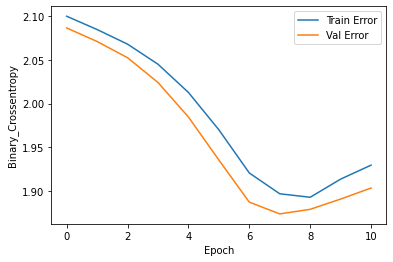

In [28]:
hist = pd.DataFrame(history.history)
print(hist['loss'],hist['val_loss'])
hist["epoch"] = history.epoch
# Plotting the Train Vs Val Error:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Binary_Crossentropy')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 50])

plot_history()

In [29]:
maxlen = 1500
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, maxlen = maxlen, truncating = trunc_type, padding = pad_type)

predictions = model.predict(test_padded)
model.evaluate(test_padded, y_test, batch_size=32)

32/32 [==============================] - 1s 24ms/step - loss: 1.9940 - accuracy: 0.1475


[1.9939548969268799, 0.1474609375]

In [30]:
# This function prepares input to be fed into the BERT Model.
def prepare_bert_input(sentences, seq_len, bert_name):
    tokenizer = BertTokenizer.from_pretrained(bert_name)
    encodings = tokenizer(sentences.tolist(), truncation=True, padding='max_length',
                                max_length=seq_len)
    input = [np.array(encodings["input_ids"]), np.array(encodings["token_type_ids"]),
               np.array(encodings["attention_mask"])]
    return input

In [31]:
from transformers import TFBertModel, BertTokenizer

In [32]:
# Converting Input train,val and test data into a format that can be understand by the BERT Model.
X_train = prepare_bert_input(train_sentences, MAX_SEQ_LEN, BERT_NAME)
X_val = prepare_bert_input(val_sentences, MAX_SEQ_LEN, BERT_NAME)
X_test = prepare_bert_input(test_sentences, MAX_SEQ_LEN, BERT_NAME)

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [33]:
import tensorflow.keras.layers as layers

In [34]:
# Creating the BERT Model.
input_ids = layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name='input_ids')
input_type = layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name='token_type_ids')
input_mask = layers.Input(shape=(MAX_SEQ_LEN,), dtype=tf.int32, name='attention_mask')
inputs = [input_ids, input_type, input_mask]
bert = TFBertModel.from_pretrained(BERT_NAME)
bert_outputs = bert(inputs)
last_hidden_states = bert_outputs.last_hidden_state
avg = layers.GlobalAveragePooling1D()(last_hidden_states)
output = layers.Dense(N_AXIS, activation="sigmoid")(avg)
model = keras.Model(inputs=inputs, outputs=output)
model.summary()

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 128)]        0           []                               
                                                                                                  
 token_type_ids (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 128)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'token_type_ids[0][0]',     

In [35]:
import tensorflow_addons as tfa

In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [37]:
# Defining Model Parameters:
max_epochs = 7
batch_size = 32
opt = tfa.optimizers.RectifiedAdam(learning_rate=3e-5)
loss = keras.losses.BinaryCrossentropy()
best_weights_file = "weights.h5"
auc = keras.metrics.AUC(multi_label=True, curve="ROC")
m_ckpt = ModelCheckpoint(best_weights_file, monitor='val_'+auc.name, mode='max', verbose=1,
                          save_weights_only=True, save_best_only=True)
model.compile(loss=loss, optimizer=opt, metrics=[auc, keras.metrics.BinaryAccuracy()])

# Fitting the Model:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=max_epochs,
    batch_size=batch_size,
    callbacks=[m_ckpt],
    verbose=1
)

Epoch 1/7
207/207 [==============================] - ETA: 0s - loss: 0.5751 - auc: 0.5667 - binary_accuracy: 0.6961
Epoch 1: val_auc improved from -inf to 0.69912, saving model to weights.h5
207/207 [==============================] - 207s 913ms/step - loss: 0.5751 - auc: 0.5667 - binary_accuracy: 0.6961 - val_loss: 0.5251 - val_auc: 0.6991 - val_binary_accuracy: 0.7463
Epoch 2/7
207/207 [==============================] - ETA: 0s - loss: 0.4863 - auc: 0.7525 - binary_accuracy: 0.7711
Epoch 2: val_auc improved from 0.69912 to 0.78468, saving model to weights.h5
207/207 [==============================] - 197s 951ms/step - loss: 0.4863 - auc: 0.7525 - binary_accuracy: 0.7711 - val_loss: 0.4768 - val_auc: 0.7847 - val_binary_accuracy: 0.7771
Epoch 3/7
207/207 [==============================] - ETA: 0s - loss: 0.4440 - auc: 0.8077 - binary_accuracy: 0.7970
Epoch 3: val_auc improved from 0.78468 to 0.80093, saving model to weights.h5
207/207 [==============================] - 198s 955ms/step 

In [38]:
hist = pd.DataFrame(history.history)


In [39]:
print(hist['loss'],hist['val_loss'])

0    0.575080
1    0.486283
2    0.444014
3    0.409681
4    0.361189
5    0.295250
6    0.221820
Name: loss, dtype: float64 0    0.525129
1    0.476843
2    0.473904
3    0.461003
4    0.469215
5    0.505816
6    0.583501
Name: val_loss, dtype: float64


In [40]:
hist["epoch"] = history.epoch

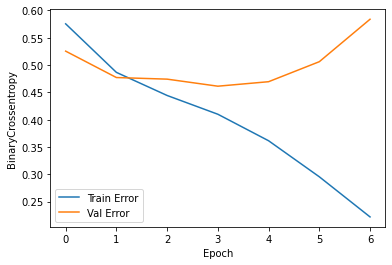

In [41]:
# Plotting the Train Vs Val Error:
def plot_history():
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('BinaryCrossentropy')
    plt.plot(hist['epoch'], hist['loss'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_loss'], label='Val Error')
    plt.legend()
    # plt.ylim([0, 50])

plot_history()

In [42]:
loss = keras.losses.BinaryCrossentropy()
best_weights_file = "weights.h5"
model.load_weights(best_weights_file)
opt = tfa.optimizers.RectifiedAdam(learning_rate=3e-5)
model.compile(loss=loss, optimizer=opt, metrics=[keras.metrics.AUC(multi_label=True, curve="ROC"),
                                                  keras.metrics.BinaryAccuracy()])
predictions = model.predict(X_test)
model.evaluate(X_test, y_test, batch_size=32)

32/32 [==============================] - 12s 273ms/step - loss: 0.5019 - auc_1: 0.7945 - binary_accuracy: 0.7812


[0.5019081234931946, 0.7945380210876465, 0.78125]

In [43]:
X_train[0].shape

(6624, 128)

In [44]:
y_train.shape

(6624, 4)

In [45]:
X_test[0].shape

(1024, 128)

In [46]:
predictions

array([[0.22, 0.05, 0.26, 0.3 ],
       [0.01, 0.03, 0.96, 0.97],
       [0.39, 0.03, 0.07, 0.77],
       ...,
       [0.11, 0.65, 0.2 , 0.07],
       [0.32, 0.34, 0.92, 0.62],
       [0.12, 0.  , 0.03, 0.91]], dtype=float32)

In [48]:
# Testing the Resukts using Random Text Input.
s1 = "I like studying deep learning, playing football and my guitar, " \
     "and I love visit foreign cities all over the world."
sentences = np.asarray([s1])
enc_sentences = prepare_bert_input(sentences, MAX_SEQ_LEN, BERT_NAME)
predictions = model.predict(enc_sentences)
for sentence, pred in zip(sentences, predictions):
    pred_axis = []
    mask = (pred > 0.5).astype(bool)
    for i in range(len(mask)):
        if mask[i]:
            pred_axis.append(axes[i][2])
        else:
            pred_axis.append(axes[i][0])
    print('-- comment: '+sentence.replace("\n", "").strip() +
          '\n-- personality: '+str(pred_axis) +
          '\n-- scores:'+str(pred))

-- comment: I like studying deep learning, playing football and my guitar, and I love visit foreign cities all over the world.
-- personality: ['I', 'N', 'F', 'P']
-- scores:[0.01 0.34 0.51 0.78]
